Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: prarthanamore
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/mariamosamakhalifa/pediatric-dental-caries-detection-dataset


100%|██████████| 70.2M/70.2M [00:00<00:00, 1.42GB/s]

✅ Dataset reorganized for YOLOv8 at: dental_yolov8/data
✅ Created data.yaml
Ultralytics 8.3.228 🚀 Python-3.12.12 torch-2.8.0+cu126 CPU (Intel Xeon CPU @ 2.20GHz)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=dental_yolov8/data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=au

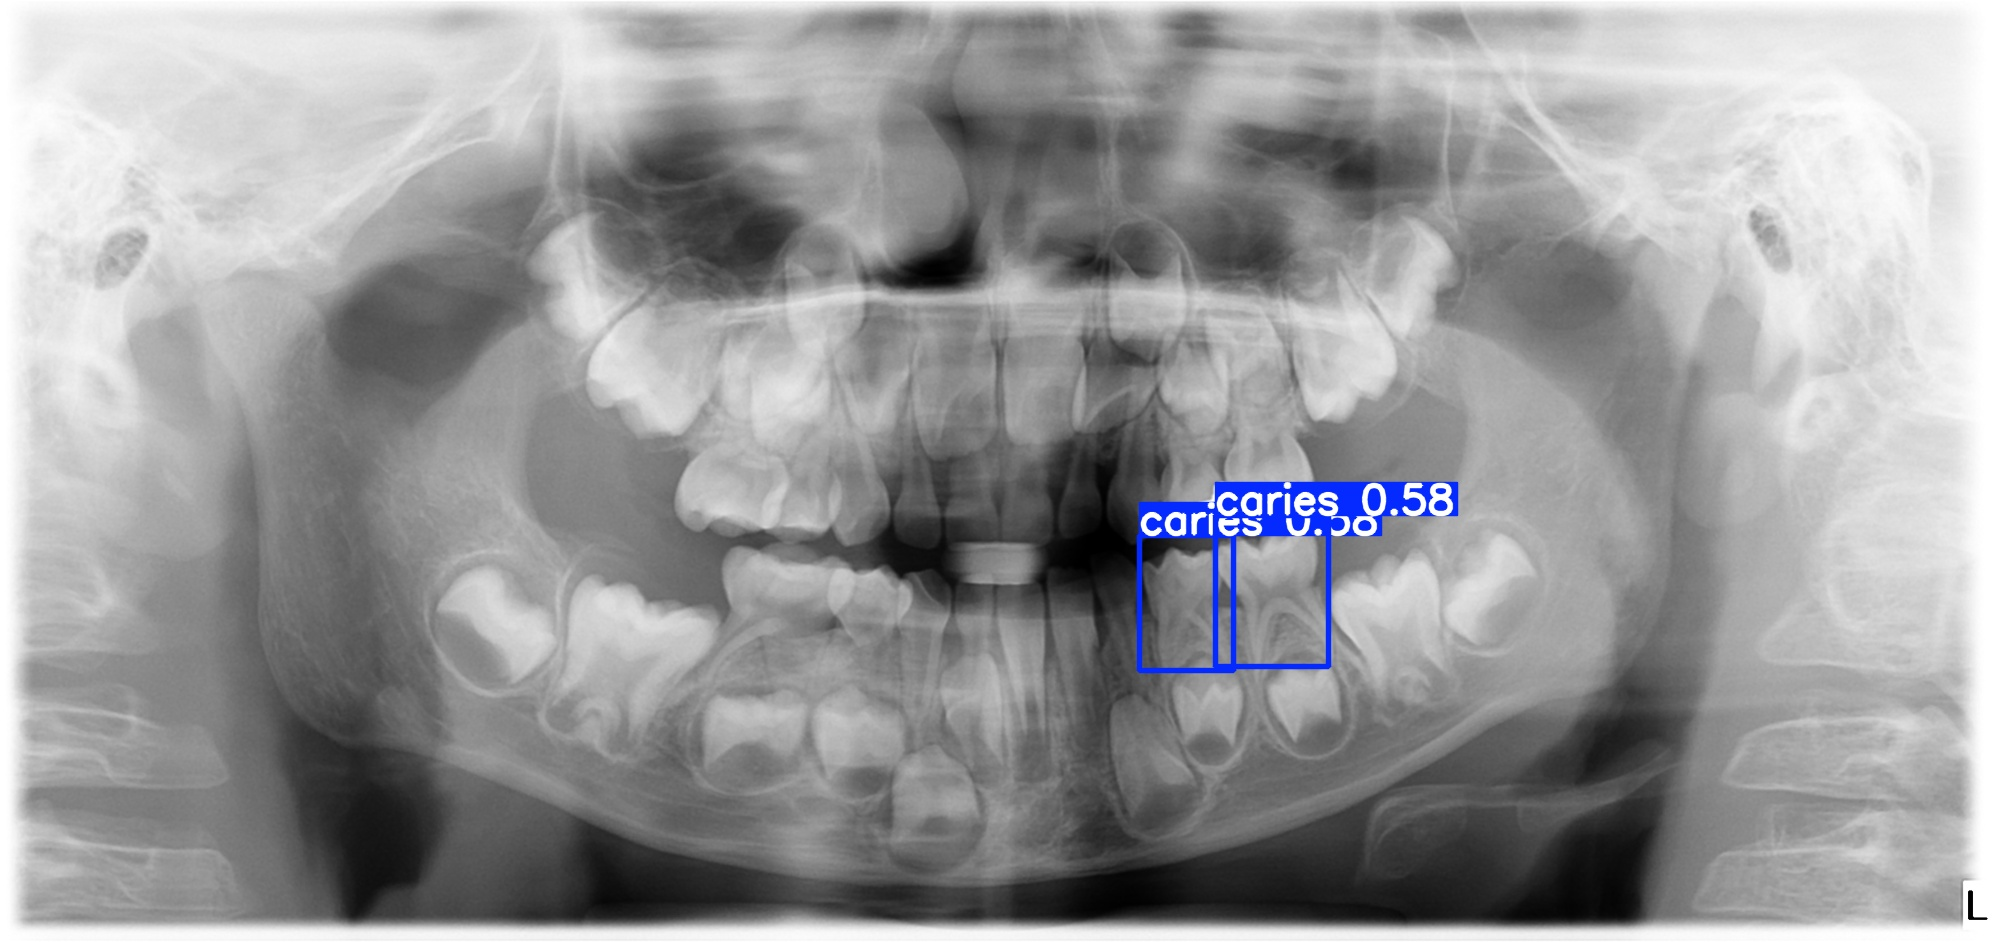

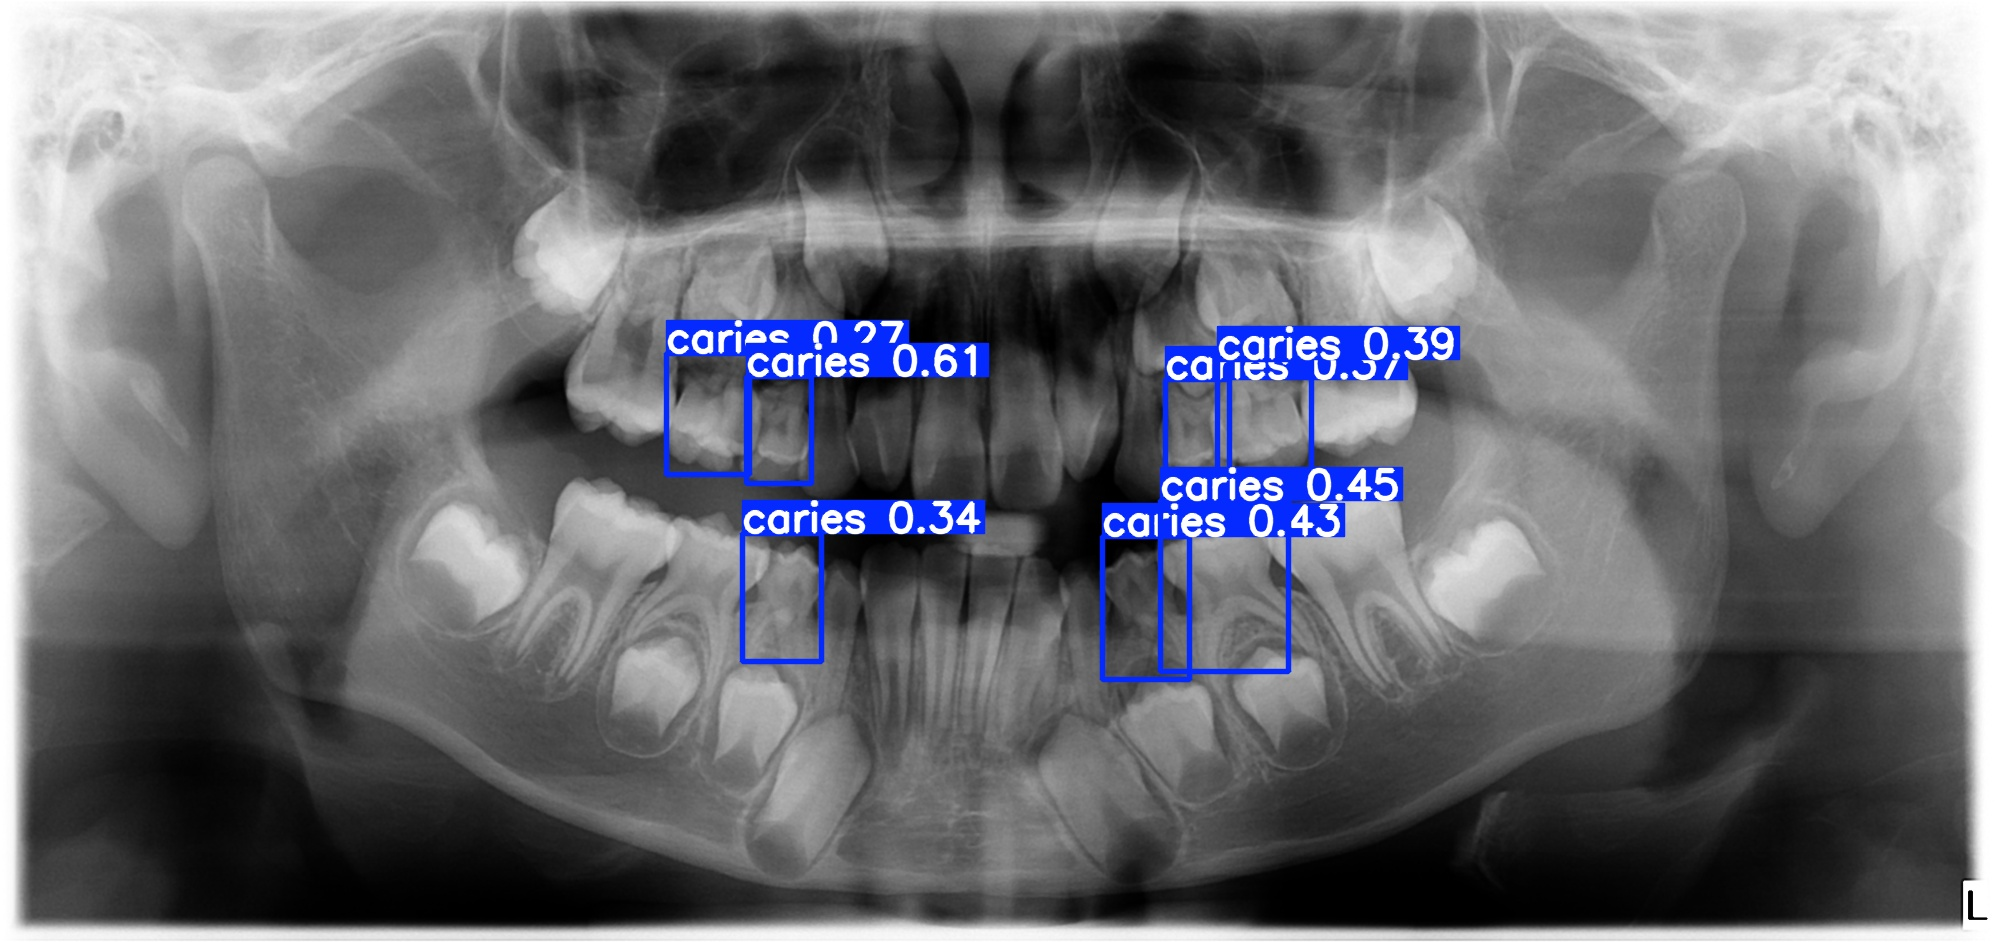

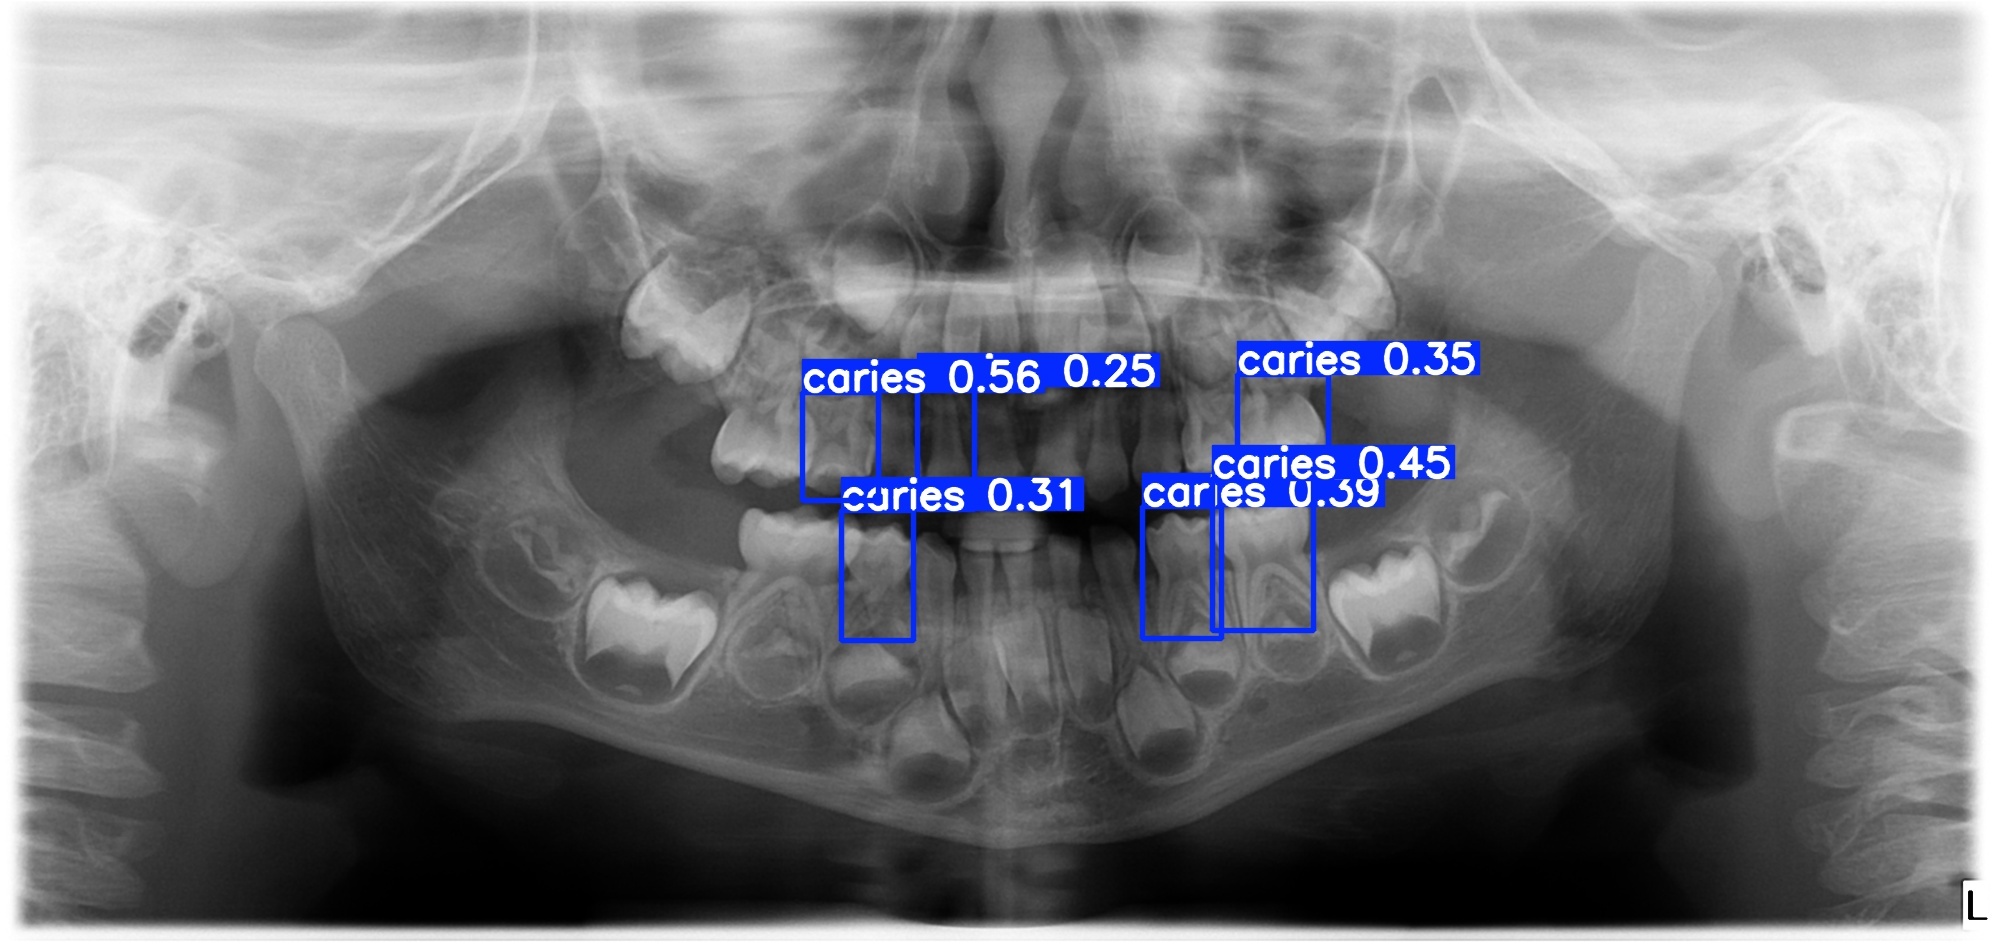

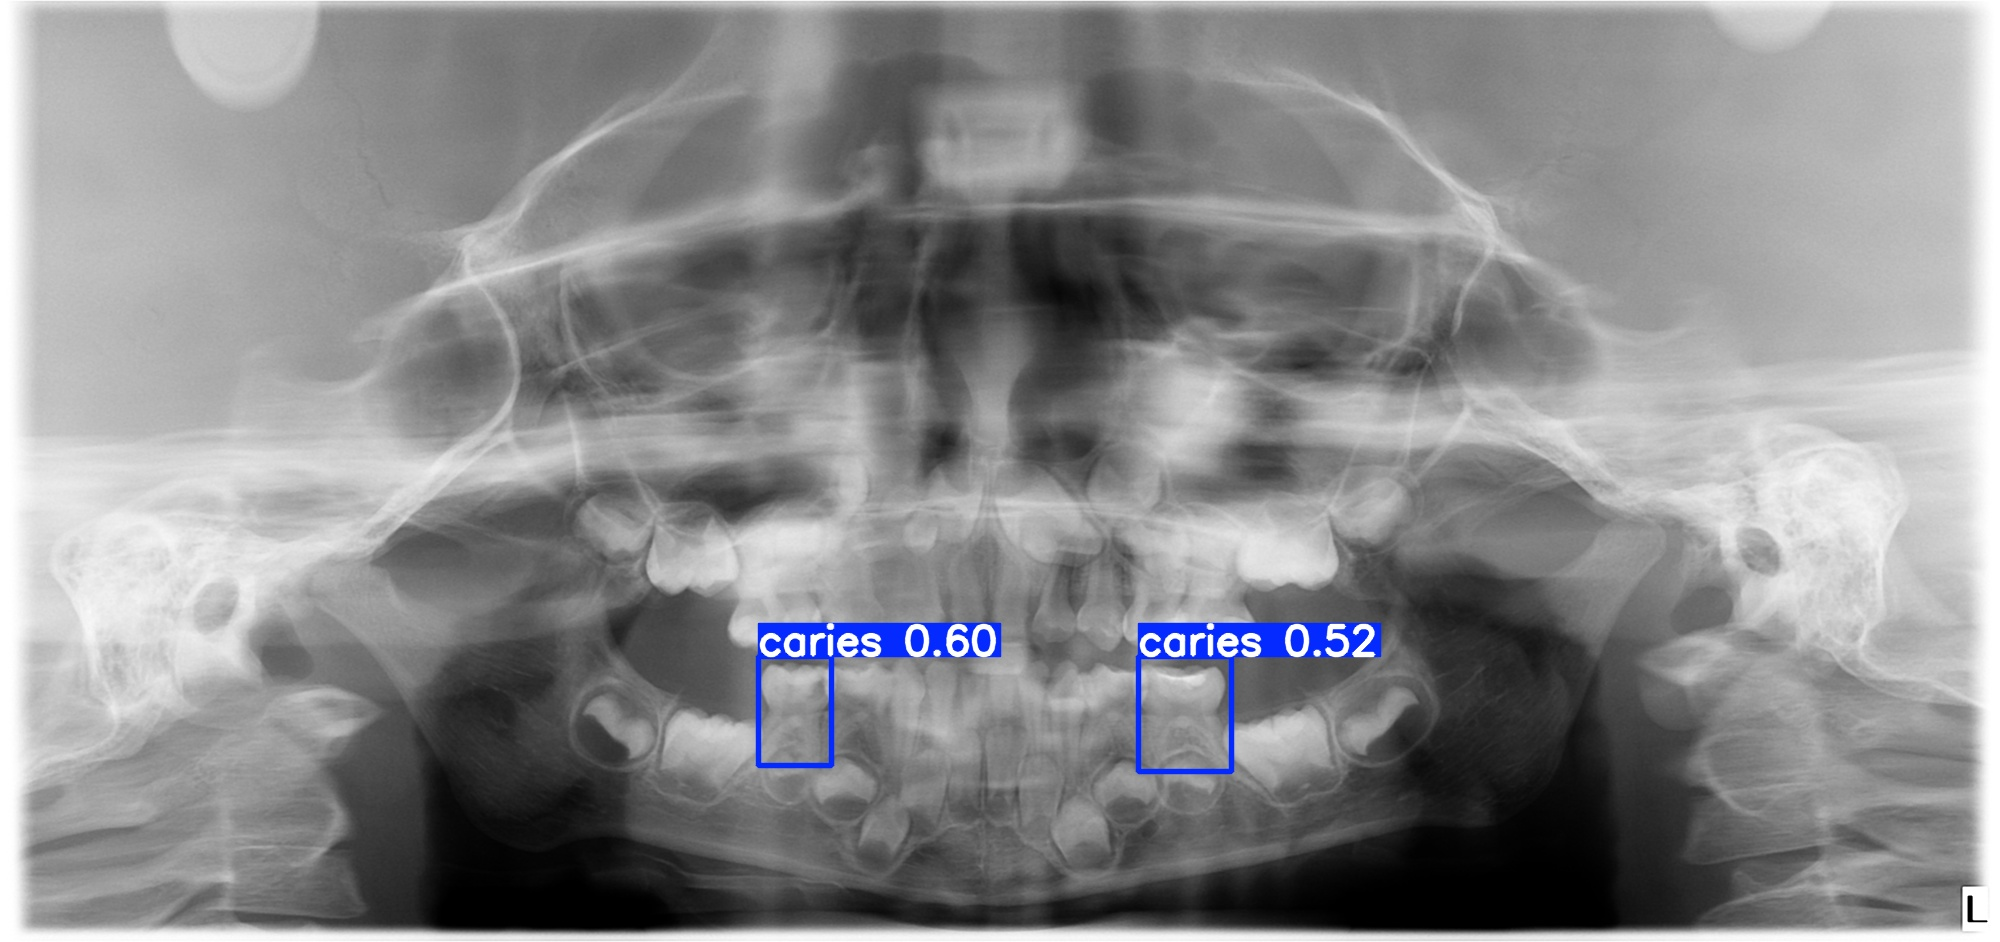

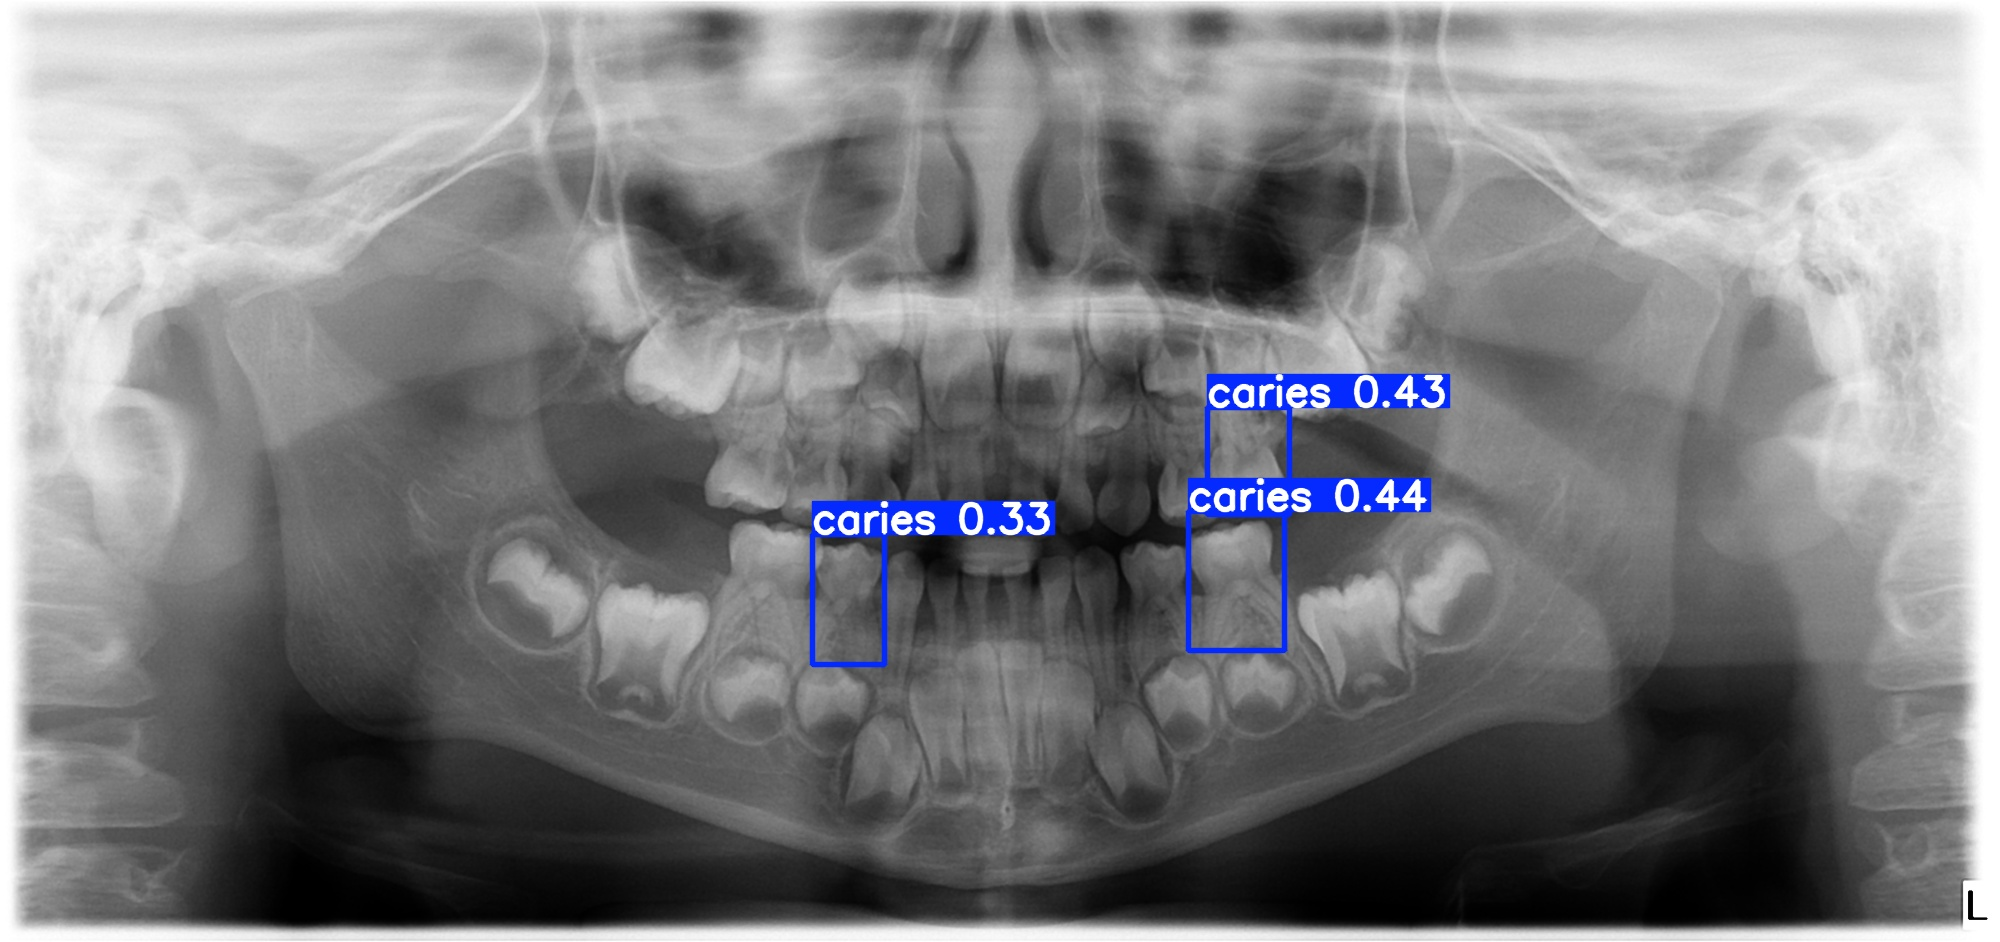

  adding: content/runs/detect/predict/ (stored 0%)
  adding: content/runs/detect/predict/cate2_002.jpg (deflated 0%)
  adding: content/runs/detect/predict/cate1_013.jpg (deflated 0%)
  adding: content/runs/detect/predict/cate2_012.jpg (deflated 0%)
  adding: content/runs/detect/predict/cate2_001.jpg (deflated 0%)
  adding: content/runs/detect/predict/cate1_014.jpg (deflated 0%)
  adding: content/runs/detect/predict/cate2_005.jpg (deflated 0%)
  adding: content/runs/detect/predict/cate2_006.jpg (deflated 0%)
  adding: content/runs/detect/predict/cate2_003.jpg (deflated 0%)
  adding: content/runs/detect/predict/cate2_000.jpg (deflated 0%)
  adding: content/runs/detect/predict/cate1_007.jpg (deflated 0%)
  adding: content/runs/detect/predict/cate2_011.jpg (deflated 0%)
  adding: content/runs/detect/predict/cate2_008.jpg (deflated 0%)
  adding: content/runs/detect/predict/cate1_002.jpg (deflated 0%)
  adding: content/runs/detect/predict/cate1_011.jpg (deflated 0%)
  adding: content/runs/de

In [ ]:

# Install and Import Packages

!pip install ultralytics opendatasets -q

import os, shutil, random
from pathlib import Path
from ultralytics import YOLO
import opendatasets as od

# Download Dataset from Kaggle

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download dataset
od.download("https://www.kaggle.com/datasets/mariamosamakhalifa/pediatric-dental-caries-detection-dataset")


#  Reorganize Dataset for YOLOv8
base = Path("pediatric-dental-caries-detection-dataset/Pediatric dental disease detection dataset")
out_base = Path("dental_yolov8/data")

# Input paths
train_img = base / "Train" / "images"
train_lbl = base / "Train" / "Train labels"
test_img = base / "Test" / "images"
test_lbl = base / "Test" / "Test labels"

# Output structure
(out_base / "images/train").mkdir(parents=True, exist_ok=True)
(out_base / "labels/train").mkdir(parents=True, exist_ok=True)
(out_base / "images/val").mkdir(parents=True, exist_ok=True)
(out_base / "labels/val").mkdir(parents=True, exist_ok=True)
(out_base / "images/test").mkdir(parents=True, exist_ok=True)
(out_base / "labels/test").mkdir(parents=True, exist_ok=True)

# Split some training data into validation
train_images = list(train_img.glob("*.png"))
random.shuffle(train_images)
val_split = int(0.1 * len(train_images))
val_images = train_images[:val_split]
new_train_images = train_images[val_split:]

def copy_pairs(img_paths, src_label_dir, dest_img_dir, dest_lbl_dir):
    for img_path in img_paths:
        lbl_path = src_label_dir / (img_path.stem + ".txt")
        if lbl_path.exists():
            shutil.copy2(img_path, dest_img_dir / img_path.name)
            shutil.copy2(lbl_path, dest_lbl_dir / lbl_path.name)

# Copy train/val/test
copy_pairs(new_train_images, train_lbl, out_base/"images/train", out_base/"labels/train")
copy_pairs(val_images, train_lbl, out_base/"images/val", out_base/"labels/val")

test_images = list(test_img.glob("*.png"))
copy_pairs(test_images, test_lbl, out_base/"images/test", out_base/"labels/test")

print("✅ Dataset reorganized for YOLOv8 at:", out_base)


# Create data.yaml file

data_yaml = """\
path: dental_yolov8/data
train: images/train
val: images/val
test: images/test
names:
  0: caries
"""
with open("dental_yolov8/data.yaml", "w") as f:
    f.write(data_yaml)
print("✅ Created data.yaml")


# Train YOLOv8 Model

model = YOLO("yolov8n.pt")  # small and fast model; can change to yolov8m.pt for more accuracy

model.train(
    data="dental_yolov8/data.yaml",
    epochs=50,        # You can increase to 100+ for better performance
    imgsz=640,
    batch=8,
)


# Evaluate and Run Inference

metrics = model.val(data="dental_yolov8/data.yaml")
print("✅ Validation complete. Metrics:")
print(metrics)

results = model.predict(source="dental_yolov8/data/images/test", conf=0.25, save=True)
print("✅ Inference complete. Results saved to:", results[0].save_dir)


#  Display a few predicted images

import glob
from IPython.display import Image, display

pred_dir = str(results[0].save_dir)
print(f"📸 Showing sample results from: {pred_dir}")

for image_path in glob.glob(pred_dir + "/*.jpg")[:5] + glob.glob(pred_dir + "/*.png")[:5]:
    display(Image(filename=image_path))


#  Zip and Download Results

!zip -r /content/yolo_dental_results.zip {pred_dir}
print("✅ Results zipped")
